In [27]:
include("fld.jl")
using VectorizedRoutines
using PyPlot
using CSV
using SparseArrays

In [13]:
#read in Su-Olson solution
su_x = convert(Matrix,CSV.read("suolson_x.csv", header=0))
su_t = convert(Matrix,CSV.read("suolson_t.csv", header=0))
su_rad = convert(Matrix,CSV.read("suolson_rad.csv", header=0))
su_mat = convert(Matrix,CSV.read("suolson_mat.csv", header=0))

function linspace(start,stop,length)
    return range(start,stop=stop,length=length)
end

linspace (generic function with 1 method)

In [19]:
#choose time
index = 5
tfinal = .1
println("Running until time $(tfinal)")
#set up Su-Olson problem with large R
Nr = 100
Nz = 100
Lz = 5
println("Size of domain in Z is $(Lz)")
Lr = 5
dr = Lr/Nr
dz = Lz/Nz
T = zeros(Nr*Nz) .+ 1.0e-8

sigma_func(t,T,Nr,Nz,Lr,Lz) = 100.0 .+ 0*reshape(T,Nr,Nz)
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)
Cv_func(t,T,Nr,Nz,Lr,Lz) = reshape(4*a*T.^3, Nr,Nz)
EOS(t,T,Nr,Nz,Lr,Lz) = a*T.^4
invEOS(t,E,Nr,Nz,Lr,Lz) = (E/a).^.25

function Q_func(t,T,Nr,Nz,Lr,Lz)
    hr = Lr/Nr
    hz = Lz/Nz
    Q = zeros(Nr,Nz)
    zmid = range(0, stop=Lz-hz*0.5,length=Nz)
    rmid = linspace(0, Lr-hr*0.5,Nr)
    for i in 1:Nz
        for j in 1:Nr
            if ((t < 10) & ((sqrt(zmid[i]^2 + rmid[j]^2) < 3.0) & (sqrt(zmid[i]^2 + rmid[j]^2) >= 2.0)))
                Q[j,i] = c/(100)
            end
        end
    end
    Q
end


Running until time 0.1
Size of domain in Z is 5


Q_func (generic function with 1 method)

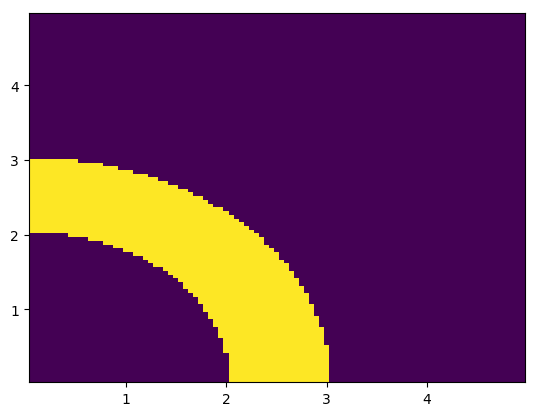

PyObject <matplotlib.collections.QuadMesh object at 0x7f9b20714c18>

In [20]:
rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
R,Z = meshgrid(rcenter,zcenter)
sig = Q_func(0,T,Nr,Nz,Lr,Lz)
pcolormesh(Z,R,(sig))

In [28]:
times, Er_t,T_t = time_dep_RT(tfinal*10,0.001,T,zeros(Nr*Nz),D_func, sigma_func, Q_func,Cv_func,EOS,invEOS,
                      Nr, Nz, Lr, Lz, lower_z="refl", upper_z="vacuum", upper_r="vacuum",LOUD=-1);

1001
Step 1000, t = 1.0


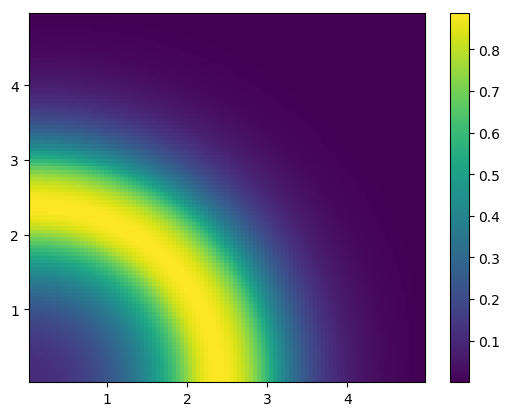

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9b010df048>

In [29]:
Er_plot = reshape((Er_t[:,size(times)[1]]),Nr,Nz)
pcolormesh(Z,R,Er_plot)
colorbar()

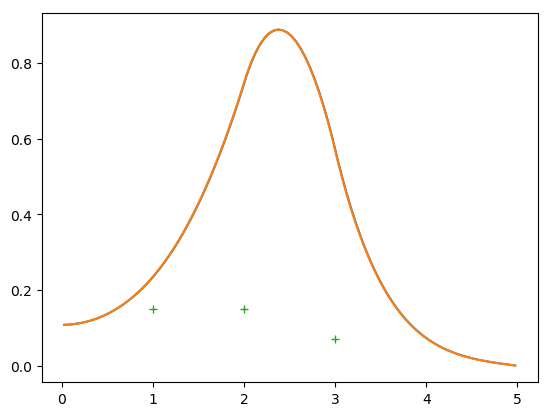

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9b010df828>

In [30]:
plot(zcenter,Er_plot[1,:])
plot(rcenter,Er_plot[:,1])
plot([1,2,3], [0.1499597097,0.149809950510503,0.07078069634],"+")

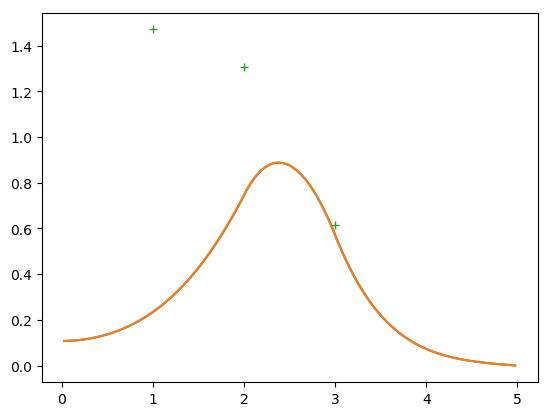

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9b205585f8>

In [31]:
plot(zcenter,Er_plot[1,:])
plot(rcenter,Er_plot[:,1])
plot([1,2,3], [1.470432247112850229,1.30684112459166,0.6166683874951],"+")

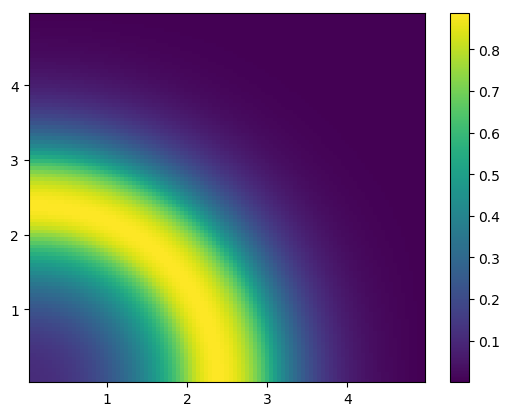

PyObject <matplotlib.colorbar.Colorbar object at 0x7f9b3340a7b8>

In [32]:
T_plot = reshape((T_t[:,size(times)[1]]),Nr,Nz)
pcolormesh(Z,R,T_plot.^4*a)
colorbar()

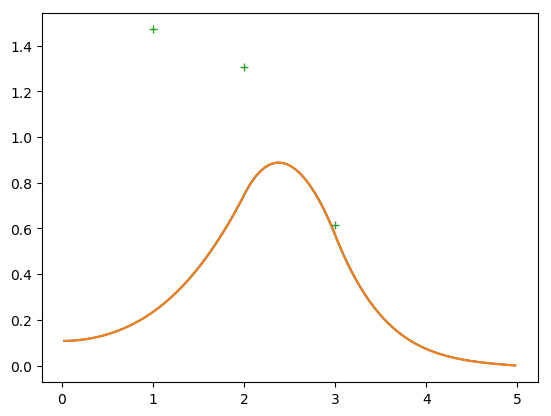

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9b339718d0>

In [33]:
plot(zcenter,T_plot[1,:].^4*a)
plot(rcenter,T_plot[:,1].^4*a)
plot([1,2,3], [1.4703860726514658,1.30689006084,0.6166500342051169],"+")

In [6]:
import Pkg; Pkg.add("VectorizedRoutines")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [=====>                                   ]  11.7 %>                              ]  24.0 %Fetching: [==============>                          ]  34.7 %>                     ]  47.1 %Fetching: [=====================>                   ]  51.3 %>              ]  63.6 %Fetching: [=============================>           ]  71.7 %Fetching: [===============================>         ]  76.4 %  ]  93.0 %Fetching: [======================================>  ]  94.9 % Resolving package versions...
 Installed Missings ─────────── v0.4.3
 Installed VectorizedRoutines ─ v0.1.0
 Installed PDMats ───────────── v0.9.10
 Installed StatsFuns ────────── v0.8.0
 Installed Rmath ────────────── v0.5.0
 Installed Compat ───────────── v2.2.0
 Installed QuadGK ───────────── v2.0.3
 Installed Distributions ────── v0.